In [0]:
import pandas as pd

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [38]:
ls

sales_data_testing.csv  sales_data_training.csv  sample_data/  scaler.save


In [0]:
# Load the data
training_data_df = pd.read_csv('sales_data_training.csv')

In [40]:
training_data_df.head()

,critic_rating,is_action,is_exclusive_to_us,is_portable,is_role_playing,is_sequel,is_sports,suitable_for_kids,total_earnings,unit_price
0,3.5,1,0,1,0,1,0,0,132717,59.99
1,4.5,0,0,0,0,1,1,0,83407,49.99
2,3.0,0,0,0,0,1,1,0,62423,49.99
3,4.5,1,0,0,0,0,0,1,69889,39.99
4,4.0,1,0,1,0,1,0,1,161382,59.99


In [0]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_training = scaler.fit_transform(training_data_df)

In [42]:
from sklearn.externals import joblib
scaler_filename = "scaler.save"
joblib.dump(scaler, scaler_filename)  

['scaler.save']

In [0]:
scaler = joblib.load(scaler_filename)

In [0]:
# scaler.inverse_transform(scaled_training)

In [45]:
scaled_training

array([[0.5       , 1.        , 0.        , ..., 0.        , 0.37471396,
        1.        ],
       [0.83333333, 0.        , 0.        , ..., 0.        , 0.19242528,
        0.5       ],
       [0.33333333, 0.        , 0.        , ..., 0.        , 0.11485185,
        0.5       ],
       ...,
       [0.83333333, 0.        , 1.        , ..., 0.        , 0.61007375,
        1.        ],
       [0.5       , 1.        , 1.        , ..., 1.        , 0.24626902,
        0.        ],
       [0.33333333, 1.        , 0.        , ..., 1.        , 0.21633242,
        0.5       ]])

In [0]:
scaled_training_df = pd.DataFrame(scaled_training,columns=training_data_df.columns.values)
#scaled_training_df.to_csv('./data/sales_training_scaled.csv',index=False)

In [47]:
scaled_training_df.head()

,critic_rating,is_action,is_exclusive_to_us,is_portable,is_role_playing,is_sequel,is_sports,suitable_for_kids,total_earnings,unit_price
0,0.500000,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.374714,1.0
1,0.833333,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.192425,0.5
2,0.333333,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.114852,0.5
3,0.833333,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.142452,0.0
4,0.666667,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.480682,1.0


In [48]:
scaled_training_df.describe()

,critic_rating,is_action,is_exclusive_to_us,is_portable,is_role_playing,is_sequel,is_sports,suitable_for_kids,total_earnings,unit_price
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.553333,0.466000,0.267000,0.24300,0.347000,0.746000,0.187000,0.270000,0.293341,0.709000
std,0.278008,0.499092,0.442614,0.42911,0.476254,0.435515,0.390107,0.444182,0.166247,0.401846
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.333333,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.175506,0.500000
50%,0.583333,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.269794,1.000000
75%,0.833333,1.000000,1.000000,0.00000,1.000000,1.000000,0.000000,1.000000,0.376762,1.000000
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
# scaled_training_df['total_earnings']

In [0]:
X = scaled_training_df.drop('total_earnings',axis=1).values
y = scaled_training_df[['total_earnings']].values

In [51]:
import keras

Using TensorFlow backend.


In [0]:
from keras.models import Sequential
from keras.layers import Dense

In [53]:
model = Sequential()
model.add(Dense(50,input_dim=9,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(200,activation='relu'))
model.add(Dense(1,activation='linear'))

In [0]:
# model.summary()

In [55]:
model.compile(loss='mean_squared_error',optimizer='adam')

In [56]:
history = model.fit(X,y,epochs=50,shuffle=True, validation_split = 0.2)



Train on 800 samples, validate on 200 samples
Epoch 1/50
800/800 [==============================] - 1s 884us/step - loss: 0.0312 - val_loss: 0.0083
Epoch 2/50
800/800 [==============================] - 0s 60us/step - loss: 0.0043 - val_loss: 0.0018
Epoch 3/50
800/800 [==============================] - 0s 66us/step - loss: 0.0013 - val_loss: 7.9886e-04
Epoch 4/50
800/800 [==============================] - 0s 52us/step - loss: 6.4779e-04 - val_loss: 4.2671e-04
Epoch 5/50
800/800 [==============================] - 0s 54us/step - loss: 3.7288e-04 - val_loss: 3.0695e-04
Epoch 6/50
800/800 [==============================] - 0s 55us/step - loss: 2.4438e-04 - val_loss: 2.3659e-04
Epoch 7/50
800/800 [==============================] - 0s 64us/step - loss: 1.7441e-04 - val_loss: 1.9985e-04
Epoch 8/50
800/800 [==============================] - 0s 58us/step - loss: 1.2235e-04 - val_loss: 1.7922e-04
Epoch 9/50
800/800 [==============================] - 0s 51us/step - loss: 1.0686e-04 - val_loss: 1

In [0]:
scale = scaler.scale_[8]

In [58]:
scaler.scale_

array([3.33333333e-01, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       3.69678934e-06, 5.00000000e-02])

In [59]:
scaler.min_

array([-0.66666667,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.11591283, -1.9995    ])

In [0]:
min = scaler.min_[8]

In [0]:
import numpy as np
X_single = np.array([[0.5,1,1,1,0,1,0,1,1]])

In [62]:
X_single

array([[0.5, 1. , 1. , 1. , 0. , 1. , 0. , 1. , 1. ]])

In [0]:
yhat= model.predict(X_single)

In [64]:
yhat

array([[0.8235288]], dtype=float32)

In [71]:
(yhat/scale)+min

array([[103781.27]], dtype=float32)

In [66]:
single_record = [[3.5,1,	0,	1,	0,	1,	0,	0,	0,	59.99]]
single_scaled = scaler.transform(single_record)
single_scaled

array([[ 0.5       ,  1.        ,  0.        ,  1.        ,  0.        ,
         1.        ,  0.        ,  0.        , -0.11591283,  1.        ]])

In [0]:
import numpy as np
single_scaled = np.delete(single_scaled, 8, axis = 1)

In [68]:
single_scaled

array([[0.5, 1. , 0. , 1. , 0. , 1. , 0. , 0. , 1. ]])

In [0]:
yhat = model.predict(single_scaled)

In [0]:
(yhat/scale)+min

In [0]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)

In [0]:
# loss

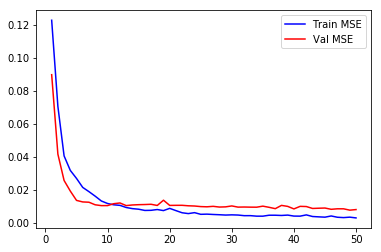

In [0]:
plt.plot(epochs, loss,'b',label='Train MSE')
plt.plot(epochs, val_loss,'r',label='Val MSE')
plt.legend()
plt.show()

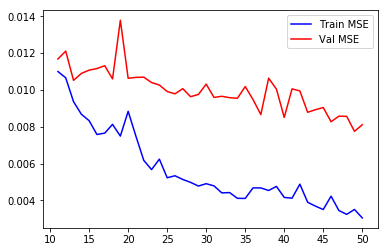

In [0]:
plt.plot(epochs[10:], loss[10:],'b',label='Train MSE')
plt.plot(epochs[10:], val_loss[10:],'r',label='Val MSE')
plt.legend()
plt.show()

# Evaluate using Test

In [0]:
# Load the data
testing_data_df = pd.read_csv('sales_data_testing.csv')

In [0]:
scaled_testing= scaler.transform(testing_data_df)

In [0]:
scaled_testing_df = pd.DataFrame(scaled_testing,columns=training_data_df.columns.values)

In [0]:
X_test = scaled_testing_df.drop('total_earnings',axis=1).values
y_test = scaled_testing_df[['total_earnings']].values

In [0]:
y_pred= model.predict(X_test)
# y_pred

In [0]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_pred, y_test) ** 0.5

0.013064740663002238

In [0]:
from sklearn.metrics import r2_score
r2_score(y_pred, y_test)

0.9944479334397248

In [0]:
y_pred_inv = (y_pred/scale)+min

In [0]:
y_test_inv = (y_test/scale)+min

In [0]:
mean_squared_error(y_pred_inv, y_test_inv) ** 0.5

3534.0792260427834

In [0]:
r2_score(y_pred_inv, y_test_inv)

0.9944479293306581

# Save Model

In [0]:
model.save('regression.h5')

In [0]:
from keras.models import load_model

In [0]:
model = load_model('regression.h5')

# Challenge: Regression

In [0]:
# Load the data
training_data_df = pd.read_csv('boston.csv')

In [0]:
# median house val
training_data_df.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [0]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_training = scaler.fit_transform(training_data_df)

In [0]:
scaled_training_df = pd.DataFrame(scaled_training,columns=training_data_df.columns.values)

In [0]:
X = scaled_training_df.drop(['medv', 'ID'],axis=1).values
y = scaled_training_df[['medv']].values

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [0]:
model = Sequential()
model.add(Dense(50,input_dim=X_train.shape[1],activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(200,activation='relu'))
model.add(Dense(1,activation='linear'))

In [0]:
model.compile(loss='mean_squared_error',optimizer='adam')

In [0]:
history = model.fit(X_train,y_train,epochs=50,shuffle=True, validation_split = 0.2)

Train on 186 samples, validate on 47 samples
Epoch 1/50
186/186 [==============================] - 0s 2ms/step - loss: 0.1229 - val_loss: 0.0899
Epoch 2/50
186/186 [==============================] - 0s 86us/step - loss: 0.0707 - val_loss: 0.0417
Epoch 3/50
186/186 [==============================] - 0s 83us/step - loss: 0.0407 - val_loss: 0.0257
Epoch 4/50
186/186 [==============================] - 0s 78us/step - loss: 0.0319 - val_loss: 0.0193
Epoch 5/50
186/186 [==============================] - 0s 77us/step - loss: 0.0270 - val_loss: 0.0137
Epoch 6/50
186/186 [==============================] - 0s 83us/step - loss: 0.0215 - val_loss: 0.0127
Epoch 7/50
186/186 [==============================] - 0s 82us/step - loss: 0.0190 - val_loss: 0.0126
Epoch 8/50
186/186 [==============================] - 0s 91us/step - loss: 0.0162 - val_loss: 0.0110
Epoch 9/50
186/186 [==============================] - 0s 73us/step - loss: 0.0133 - val_loss: 0.0105
Epoch 10/50
186/186 [==========================